# 201810954 HW09 컴퓨터과학과 안지민

## 문제

 a) convolve 함수를 cropping 방법을 이용하여 output image의 intensity를 image 표현값 안으로 유지할 수 있도록 convolve 함수를 재작성 하세요.  

 b) 3x3 Gaussian filter 와 7x7 Gaussian filter를 사용하여 cat 이미지를 smoothing 하여 그림을 출력하고, 그 차이점을 설명하세요.  

 c) 3x3 Laplacian filter를 사용하여 cat 이미지의 윤곽선을 추출하고 그림을 출력하세요. 또한, b)에서 smoothing 된 이미지를 이용하여 윤곽선을 추출하고 그림을 출력하세요.
 두 가지 경우의 차이점을 설명하세요.  

In [3]:

import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import data



cat 의 원본 사진은 아래와 같다

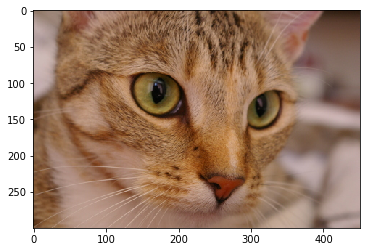

In [4]:
#color images
cat1 = data.chelsea()
plt.imshow(cat1)
plt.show()

In [16]:
cat1[1].size

1353

 a) convolve 함수를 cropping 방법을 이용하여 output image의 intensity를 image 표현값 안으로 유지할 수 있도록 convolve 함수를 재작성 하세요.  

In [5]:
from skimage.exposure import rescale_intensity

In [21]:
#paremater//image: 필터링하고자 하는 (grayscale)이미지,kernel: 필터 자체, scale: 커널하고 동일하나 이후 average를 낼 때 사용하는 값)
def convolve(image, kernel, scale = 1):
    #grab the spatial dimensions of the image, along with the spatial dimensions of the kernel
    (iH,iW) = image.shape[:2]
    (kH,kW) = kernel.shape[:2]
    
    #allocate memory for the ouput image, taking care to "pad" the borders of the input image
    #so the spatial size(i.e., width and height)are not reduced
    pad = (kW-1)//2
    output = np.zeros((iH-2*pad, iW-2*pad), dtype = "float32")
    
    #loop over the input image, "sliding" the kernel across
    #each (x,t)-coordinate from left-ro-right and top to bottom
    for x in np.arange(pad, iH-pad):
        for y in np.arange(pad, iW-pad):
            #extract the ROI of the image by extracting 
            #the *center* region of the current (x,y)-coordinates dimensions
            roi = image[x-pad:x+pad+1, y-pad:y+pad+1]
            #perform the actial convolution by taking the element-wise mutiplicate 
            #between the ROI and the kernel, then summing the matrix
            #store the convolved value in the output (x,y)-coordinate of the output image
            output[x-pad,y-pad] = (roi*kernel).sum()*scale
    
    #rescale the output image to be in the range[0,255]
    output = rescale_intensity(output, in_range=(0,255))
    output = (output*255).astype("uint8")
    
    #return the output image
    return output

b) 3x3 Gaussian filter 와 7x7 Gaussian filter를 사용하여 cat 이미지를 smoothing 하여 그림을 출력하고, 그 차이점을 설명하세요.  

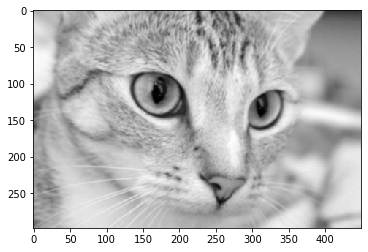

In [20]:
gaussian_3 = np.array((
      [1,2,1],
      [2,4,2],
      [1,2,1]), dtype = "int")

filtered = convolve(cat1[:,:,0], gaussian_3, scale = 1/16)
plt.imshow(filtered, cmap = plt.cm.gray)
plt.show()

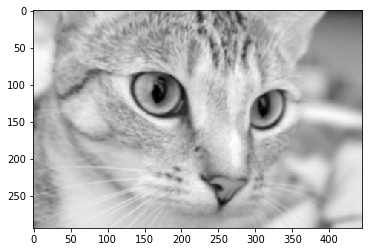

In [8]:
gaussian_7 = np.array((
      [0,0,1,2,1,0,0],
      [0,3,13,22,13,3,0],
      [1,13,59,97,59,13,1],
      [2,22,97,159,97,22,2],
      [1,13,59,97,59,13,1],
      [0,3,13,22,13,3,0],
      [0,0,1,2,1,0,0]), dtype = "int")

filtered = convolve(cat1[:,:,0], gaussian_7, scale = 1/1003)
plt.imshow(filtered, cmap = plt.cm.gray)
plt.show()

필터의 크기가 클수록 연산량이 늘어나고 선명도는 떨어지므로 3x3보다 7x7 을 적용한 필터링된 이미지가 더 smoothing, 더 블러 처리 된 것을 확인할 수 있다.

 c) 3x3 Laplacian filter를 사용하여 cat 이미지의 윤곽선을 추출하고 그림을 출력하세요. 또한, b)에서 smoothing 된 이미지를 이용하여 윤곽선을 추출하고 그림을 출력하세요.
 두 가지 경우의 차이점을 설명하세요.  

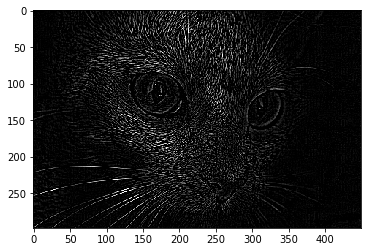

In [9]:
laplacian_3 = np.array((
              [-1,-1,-1],
              [-1,8,-1],
              [-1,-1,-1]), dtype = "int")

filtered = convolve(cat1[:,:,0], laplacian_3)
plt.imshow(filtered,cmap = plt.cm.gray)
plt.show()

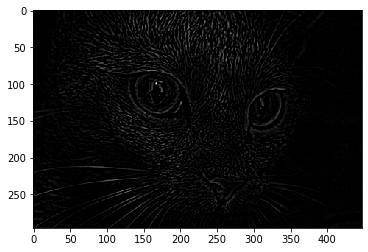

In [10]:
gaussian_3 = np.array((
      [1,2,1],
      [2,4,2],
      [1,2,1]), dtype = "int")

filtered = convolve(cat1[:,:,0], gaussian_3, scale = 1/16)
filtered = convolve(filtered, laplacian_3)
plt.imshow(filtered, cmap = plt.cm.gray)
plt.show()

gaussian을 한 이후 edge가 더 선명하게 보임을 알 수 있다. 이는 gaussian을 통해 노이즈를 제거한 후 laplacian을 통해 edge detection을 수행했기 때문이다